# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
df = pd.read_csv('sinasc_2019.csv')


In [137]:
df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [206]:
df.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea',
       'tp_asfixia'],
 

Observação: optei por alterar o atributo'Menos de 22 semanas' para '21 semanas ou menos' na coluna GESTACAO, por entender que seja uma sintaxe mais clara no contexto desta análise, além disso, o peso da ordem alfabética retornará uma sequência de valores mais adequada. 

In [144]:

df.loc[df['GESTACAO'] == 'Menos de 22 semanas', 'GESTACAO'] = '21 semanas ou menos'


In [145]:
df['GESTACAO'].value_counts()

37 a 41 semanas        22589
32 a 36 semanas         2249
42 semanas e mais        700
28 a 31 semanas          165
22 a 27 semanas           86
21 semanas ou menos        7
Name: GESTACAO, dtype: int64

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [146]:
df['APGAR5'].isnull().sum() #somando os valores nulos

103

In [147]:
df = df.dropna(subset=['APGAR5']) #usando o método subset para dropar valores duplicados de uma coluna específica

In [148]:
df['APGAR5'].isnull().sum() #verificando novamente valores nulos = 0

0

In [149]:
#Construindo uma categorização conforme as faixas de APGAR


df.loc[(df["APGAR5"] >= 8) & (df["APGAR5"] <= 10), "tp_asfixia"] = "normal"
df.loc[(df["APGAR5"] >= 6) & (df["APGAR5"] <= 7), "tp_asfixia"] = "asfixia leve"
df.loc[(df["APGAR5"] >= 4) & (df["APGAR5"] <= 5), "tp_asfixia"] = "asfixia moderada"
df.loc[(df["APGAR5"] >= 0) & (df["APGAR5"] <= 3), "tp_asfixia"] = "asfixia severa"

#lembre-se de utilizar o loc e os parenteses entre o operador booleano &.

In [150]:
df['APGAR5'].value_counts()

9.0     16076
10.0     8393
8.0      1994
7.0       241
6.0        79
5.0        45
1.0        24
4.0        23
2.0        18
0.0        17
3.0        15
Name: APGAR5, dtype: int64

In [151]:
df['GESTACAO'].value_counts()

37 a 41 semanas        22523
32 a 36 semanas         2234
42 semanas e mais        698
28 a 31 semanas          162
22 a 27 semanas           85
21 semanas ou menos        7
Name: GESTACAO, dtype: int64

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

O conjunto de dados apresenta uma quantidade de tempo de gestação muito mais expressiva entre as faixas de 37 a 42/mais semanas. Isso indica maiores registros de gestações/nascimentos dentro da faixa da normalidade humana (40 semanas).

O gráfico abaixo indica que nascimentos com APGAR considerados anormais (entre a faixa de 0 a 7) estão diretamente relacionados à gestações mais curtas (nascimentos prematuros). Destes, pela base dedados: com menos de 22 semanas de gestação há apenas nascimentos do sexo feminino e entre 22 a 27 semanas: um número expressivamente maior do sexo masculino.


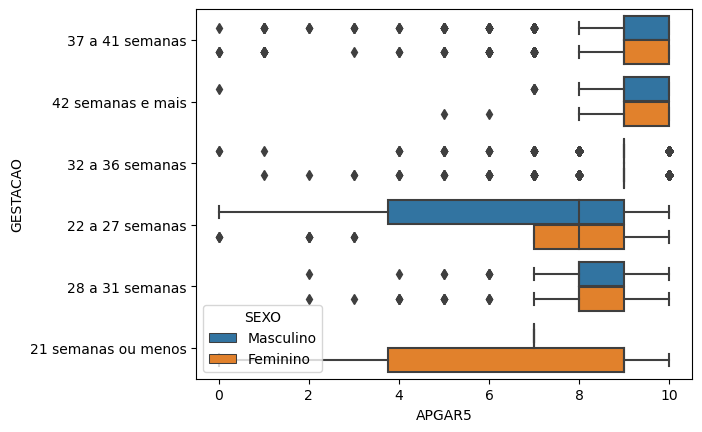

In [152]:
sns.boxplot(x='APGAR5', y='GESTACAO', hue='SEXO', data=df);

#eixo x recebe a coluna APGAR5 com os valores categorizados entre 0 a 10
#eixo y recebe a coluna GESTACAO referente com dados do número de semanas de gravidez
# a função hue irá subvidivir as informações pela variável SEXO (MASCULINO ou FEMININO)
#todas essas informações serão retiradas do df a partir da função data



####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [153]:
cruzada = pd.crosstab(index=df['GESTACAO'], columns=df['APGAR5'])

#No método crosstab, neste exeplo, a coluna gestação são transformadas em indices e a APGAR5 em colunas que variam de 0.0 a 10.0

In [154]:
cruzada

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
21 semanas ou menos,1,0,1,0,0,0,0,1,0,3,1
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7284
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [155]:
pct = cruzada.apply(lambda x: x / x.sum() * 100, axis=1)

#o método appply é usado para aplicar a função lambda em cada linha da tabela "cruzada"
#a expressão lambda recebe uma linha x.
# a linha x será dividida pela expressão x.sum() *100, ou seja...
#a soma de todos os elementos da linha multiplicados por 100 no eixo1 (horizontal)

#df.apply(lambda row: funcao_personalizada(row), axis=1)

In [156]:
pct

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
21 semanas ou menos,14.285714,0.000000,14.285714,0.000000,0.000000,0.000000,0.000000,14.285714,0.000000,42.857143,14.285714
22 a 27 semanas,8.235294,0.000000,9.411765,7.058824,1.176471,0.000000,2.352941,11.764706,28.235294,22.352941,9.411765
28 a 31 semanas,0.000000,0.000000,1.234568,0.617284,3.086420,4.320988,4.320988,6.790123,37.654321,33.950617,8.024691
32 a 36 semanas,0.089526,0.089526,0.089526,0.089526,0.358102,0.492390,0.760967,2.506714,16.204118,58.504924,20.814682
37 a 41 semanas,0.022200,0.088798,0.013320,0.022200,0.031079,0.093238,0.199796,0.670426,6.291347,60.227323,32.340274
42 semanas e mais,0.143266,0.000000,0.000000,0.000000,0.000000,0.143266,0.143266,0.716332,6.303725,60.601719,31.948424


In [157]:
data = pct.transpose()

In [158]:
data

GESTACAO,21 semanas ou menos,22 a 27 semanas,28 a 31 semanas,32 a 36 semanas,37 a 41 semanas,42 semanas e mais
APGAR5,,,,,,
0.0,14.285714,8.235294,0.000000,0.089526,0.022200,0.143266
1.0,0.000000,0.000000,0.000000,0.089526,0.088798,0.000000
2.0,14.285714,9.411765,1.234568,0.089526,0.013320,0.000000
3.0,0.000000,7.058824,0.617284,0.089526,0.022200,0.000000
4.0,0.000000,1.176471,3.086420,0.358102,0.031079,0.000000
5.0,0.000000,0.000000,4.320988,0.492390,0.093238,0.143266
6.0,0.000000,2.352941,4.320988,0.760967,0.199796,0.143266
7.0,14.285714,11.764706,6.790123,2.506714,0.670426,0.716332
8.0,0.000000,28.235294,37.654321,16.204118,6.291347,6.303725


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

No gráfico abaixo fica evidente que asfixias anormais entre 0.0 à 7.0 possuem umm grande relação com gestações de 37 semanas ou menos;
Note que as cores: Azul, Laranja, Verde e um pouco do Vermelho são as relações de prematuros com o APGAR de 0.0 a 7.0

Text(0, 0.5, 'Quantidade de Ocorrências')

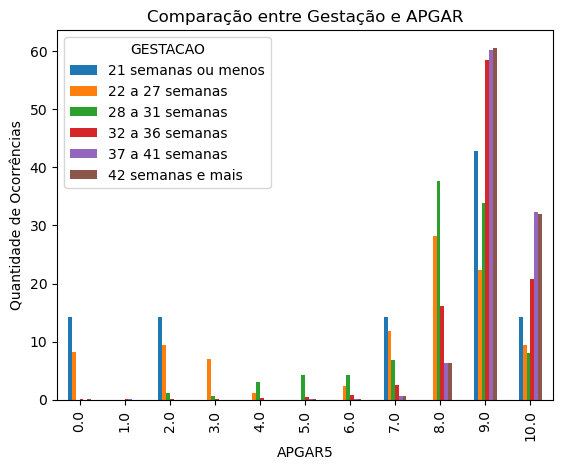

In [164]:
data.plot(kind='bar')

plt.title('Comparação entre Gestação e APGAR')
plt.ylabel('Quantidade de Ocorrências')

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

Emnbora eu esteja ciente de que existam outros métodos, eu preferi simplicar a abordagem dado o meu atual nível de compreensão.
Desta forma, construi um novo DF com o método reset_index().
Agrupei a coluna APGAR5 - método groupby -  à média - mean() - da coluna PESO. 

In [194]:
media_peso = df.groupby('APGAR5')['PESO'].mean().reset_index()


In [195]:
media_peso

,APGAR5,PESO
0,0.0,1674.058824
1,1.0,2966.041667
2,2.0,1600.222222
3,3.0,1893.000000
4,4.0,2102.739130
5,5.0,2518.111111
6,6.0,2809.772152
7,7.0,2809.954357
8,8.0,3056.361585
9,9.0,3262.088082


Text(0.5, 0, 'Peso em gramas')

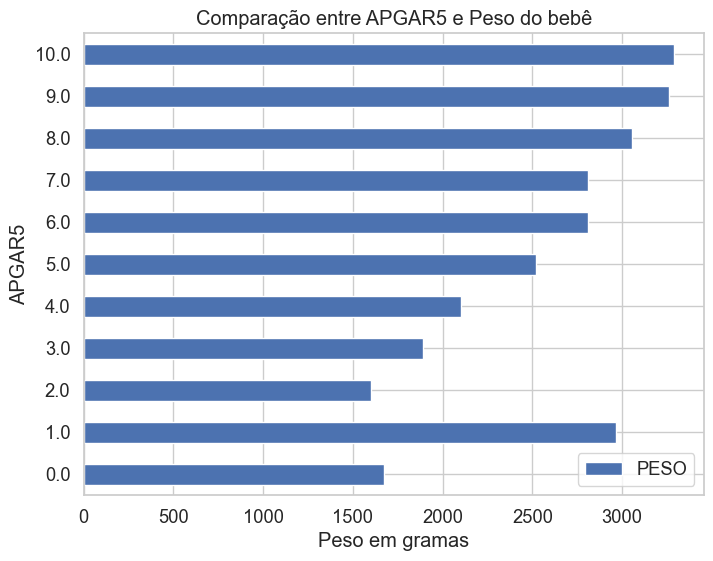

In [205]:
media_peso.plot.barh(y='PESO', x='APGAR5')
#barh - note o "h" para plotar gráfico na horizontal 

plt.title('Comparação entre APGAR5 e Peso do bebê')
plt.xlabel('Peso em gramas')



Mesmo que no índice 1.0 de APGAR5 tenhamos uma exceção (média de 3KG), a visualização da relação entre PESO e APGAR deixa claro que há uma grande correlação entre essas duas variáveis: Quanto menos peso ao nascer, maior a incidência de asfixia anormal( APGAR entre 0.0 e 7.0)